## Grupo 11
Integrantes:
- Bruno Saobya
- Esther Dagir
- Lucca Barufatti
- João Zsigmond

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

## Questão 1

In [67]:
'Inforções dadas a respeito das aleta'

T_superficie = 100
T_ambiente = 25
raio = 12e-3
comprimento = 168e-3

h = 15
k = 150

### Cálculos

In [68]:
diametro = raio * 2
perimetro = math.pi * diametro
area = (math.pi*diametro**2)/4

difTemperature = T_superficie - T_ambiente
m = math.sqrt((h*perimetro)/(k*area))
coshMl = math.cosh(m*comprimento)
sinhMl = math.sinh(m*comprimento)
hMk = h/(m*k)
distTemp = (math.cosh(0) + hMk*math.sinh(0))/(coshMl + hMk*sinhMl)

TL = distTemp * difTemperature + T_ambiente

### Grafico da temperatura

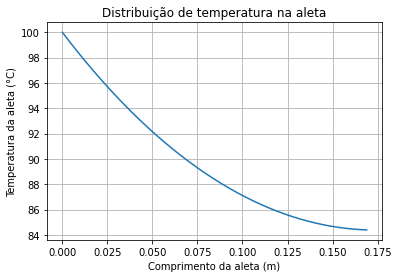

Temperatura na extremidade da aleta: 84.40 °C


In [69]:
listaX = np.arange(0, comprimento+0.001, 1e-4)
listaT = []

for i in listaX:
    dist_temp = (math.cosh(m*(comprimento - i)) + hMk*math.sinh(m*(comprimento - i)))/(math.cosh(m*comprimento) + hMk*math.sinh(m*comprimento))
    T_novo = dist_temp* difTemperature + T_ambiente
    listaT.append(T_novo)

plt.plot(listaX, listaT)
plt.title('Distribuição de temperatura na aleta')
plt.xlabel('Comprimento da aleta (m)')
plt.ylabel('Temperatura da aleta (°C)')
plt.grid(True)
plt.show()

print("Temperatura na extremidade da aleta: {:.2f} °C".format(TL))

In [70]:
# Transferência de Calor

M = math.sqrt(h * perimetro * k * area) * difTemperature
q = M * (sinhMl + hMk * coshMl)/(coshMl + hMk * sinhMl)

print("Transferência de calor = {:.2f} W".format(q))

Transferência de calor = 12.69 W


In [71]:
# Eficiência

na = q/(h * (area + (2 * raio * math.pi * comprimento))*difTemperature)

print("Eficiência = {:.2f}%".format(na*100))

Eficiência = 86.00%


In [72]:
# Efetividade

ea = q/(h * (math.pi * raio**2) * difTemperature)

print("Efetividade: {:.2f}".format(ea))

Efetividade: 24.94


Taxa de transferencia de calor para a aleta infinita 20.777
O comprimento ideal para a aleta seria: 0.73


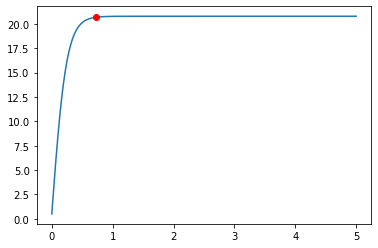

In [73]:
# Caso de aleta infinita
mInfinito = math.sqrt(h * perimetro * k * area)*difTemperature

print(f"Taxa de transferencia de calor para a aleta infinita {round(mInfinito, 3)}")

listaC = np.linspace(0,5, 10000)
listaQA = []

xIdeal = 0
qaIdeal = 0
falhou = 1

for i in listaC:
    mNovo = math.sqrt(h * perimetro * k * area)*difTemperature
    num = math.sinh(m*i) + hMk*math.cosh(m*i)
    den = math.cosh(m*i) + hMk*math.sinh(m*i)      
    qa_ideal = mNovo*(num/den)
    listaQA.append(qa_ideal)
    if falhou and abs(qa_ideal - mNovo) <= 0.1:
        xIdeal = i
        qaIdeal = qa_ideal
        falhou = 0

plt.plot(listaC, listaQA)
plt.plot(xIdeal, qaIdeal, 'ro--')
print("O comprimento ideal para a aleta seria: {:.2f}".format(xIdeal))


## Questão 2

A taxa de transferencia de calor com o ambiente aumentaria conforme a área aumentasse.

A taxa de transferência de calor irá ter um aumento muito pequeno.